In [ ]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 16.7 MB 305 kB/s 
     |████████████████████████████████| 6.3 MB 30.6 MB/s 


In [ ]:
page=requests.get("http://www.meteomaroc.com/")
page.status_code
page.content

b'\xef\xbb\xbf \n  \n<script type="text/javascript">\n\n\t$(document).ready(function() {  \n \n\t\n\t\t$.fn.extend({ \n\t\t\tcustomStyle : function(options) {\n\t\t\t\tif(!$.browser.msie || ($.browser.msie&&$.browser.version>6)){\n\t\t\t\t\treturn this.each(function() {\n\n\t\t\t\t\tvar currentSelected = $(this).find(\':selected\');\n\t\t\t\t\t$(this).after(\'<span class="customStyleSelectBox"><span class="customStyleSelectBoxInner">\'+currentSelected.text()+\'</span></span>\').css({position:\'absolute\', opacity:0,fontSize:$(this).next().css(\'font-size\')});\n\t\t\t\t\tvar selectBoxSpan = $(this).next();\n\t\t\t\t\tvar selectBoxWidth = parseInt($(this).width()) - parseInt(selectBoxSpan.css(\'padding-left\')) -parseInt(selectBoxSpan.css(\'padding-right\'));\t\t\t\n\t\t\t\t\tvar selectBoxSpanInner = selectBoxSpan.find(\':first-child\');\n\t\t\t\t\tselectBoxSpan.css({display:\'inline-block\'});\n\t\t\t\t\tselectBoxSpanInner.css({width:selectBoxWidth, display:\'inline-block\'});\n\t\t\t\

In [ ]:
soup=BeautifulSoup(page.content,'html.parser')
print(soup.prettify())

<script type="text/javascript">
 $(document).ready(function() {  
 
	
		$.fn.extend({ 
			customStyle : function(options) {
				if(!$.browser.msie || ($.browser.msie&&$.browser.version>6)){
					return this.each(function() {

					var currentSelected = $(this).find(':selected');
					$(this).after('<span class="customStyleSelectBox"><span class="customStyleSelectBoxInner">'+currentSelected.text()+'</span></span>').css({position:'absolute', opacity:0,fontSize:$(this).next().css('font-size')});
					var selectBoxSpan = $(this).next();
					var selectBoxWidth = parseInt($(this).width()) - parseInt(selectBoxSpan.css('padding-left')) -parseInt(selectBoxSpan.css('padding-right'));			
					var selectBoxSpanInner = selectBoxSpan.find(':first-child');
					selectBoxSpan.css({display:'inline-block'});
					selectBoxSpanInner.css({width:selectBoxWidth, display:'inline-block'});
					var selectBoxHeight = parseInt(selectBoxSpan.height()) + parseInt(selectBoxSpan.css('padding-top')) + parseInt(sele

In [ ]:
c=soup.find_all(class_='ville-map-nom')
city=[]
for i in range(len(c)):
  city.append(c[i].get_text())
print(city)

['agadir', 'casablanca', 'dakhla', 'errachidia', 'fes']


In [ ]:
d=soup.find_all(class_='ville-map-degre')
degre=[]
for i in range(len(d)):
  degre.append(d[i].get_text())
print(degre)

['34°/18°', '31°/20°', '22°/17°', '37°/22°', '42°/26°']


In [ ]:
weather = pd.DataFrame({
    "city":city,
    "degre":degre
})
weather

,city,degre
0,agadir,34°/18°
1,casablanca,31°/20°
2,dakhla,22°/17°
3,errachidia,37°/22°
4,fes,42°/26°


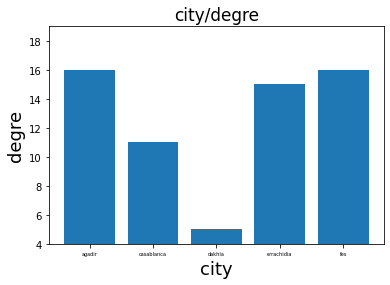

In [ ]:
L=[]
for i in range(len(degre)):
  L.append(int(degre[i][0:2])-int(degre[i][4:6]))
plt.bar(city, L)
plt.xlabel("city", fontsize=18)
plt.ylim(4,19)
plt.ylabel("degre", fontsize=18)
plt.title("city/degre", fontsize = 17)
plt.xticks(fontsize=5)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
ch=""
L=[]
for i in range(len(degre)):
  for j in range(len(degre[i])):
    if degre[i][j]!="°" or degre[i][j]!="/":
        ch+=degre[i][j]
  L.append(ch)
print (L)


['34°/18°', '34°/18°31°/20°', '34°/18°31°/20°22°/17°', '34°/18°31°/20°22°/17°37°/22°', '34°/18°31°/20°22°/17°37°/22°42°/26°']
